In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv("../Decision Tree/Fraud_check.csv")
fraud_check = fraud
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
fraud_check = fraud_check.rename(columns = {'Marital.Status': 'Marital_Status', 'Taxable.Income':'Taxable_Income','City.Population':'City_Population', 'Work.Experience':'Work_Experience'})
fraud_check.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [16]:
fraud_check.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [17]:
fraud_check.isnull().sum()



Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [18]:
fraud_check.shape

(600, 6)

In [19]:
def split(num):
    if num < 30000:
        return 'Risky'
    else:
        return 'Good'
    
fraud_check.Taxable_Income = fraud_check.Taxable_Income.apply(split)

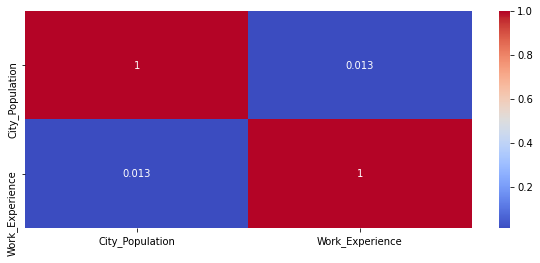

In [20]:
#Correlation heatmap
corr = fraud_check.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

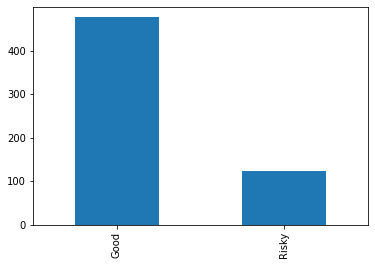

Good     476
Risky    124
Name: Taxable_Income, dtype: int64


In [21]:
fraud_check['Taxable_Income'].value_counts(sort=True).plot.bar()
plt.show()
print(fraud_check['Taxable_Income'].value_counts())

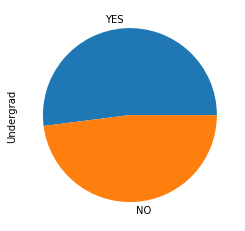

YES    312
NO     288
Name: Undergrad, dtype: int64


In [22]:
fraud_check['Undergrad'].value_counts().plot.pie()
plt.show()
print(fraud_check['Undergrad'].value_counts())

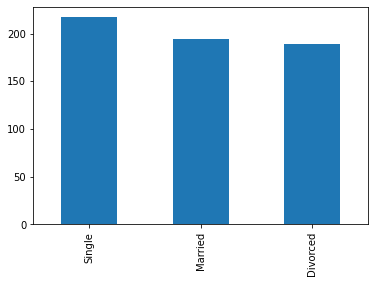

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [23]:
fraud_check['Marital_Status'].value_counts().plot.bar()
plt.show()
print(fraud_check['Marital_Status'].value_counts())

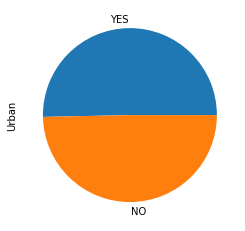

YES    302
NO     298
Name: Urban, dtype: int64


In [24]:
fraud_check['Urban'].value_counts().plot.pie()
plt.show()
print(fraud_check['Urban'].value_counts())

In [26]:
fraud_check.Taxable_Income.value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
fraud_check1 = fraud_check[['Undergrad', 'Marital_Status','Urban']].apply(label.fit_transform)
fraud_check1 = fraud_check1.rename(columns={'Undergrad':'Undergrad_','Marital_Status':'Marital_Status_','Urban':'Urban_'})
fraud_check1.head()

,Undergrad_,Marital_Status_,Urban_
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [28]:
fraud_check = pd.concat([fraud_check,fraud_check1], axis=1, sort=False)
fraud_check = fraud_check.drop(columns={'Undergrad','Marital_Status','Urban'},axis=1)
fraud_check.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_,Marital_Status_,Urban_
0,Good,50047,10,0,2,1
1,Good,134075,18,1,0,1
2,Good,160205,30,0,1,1
3,Good,193264,15,1,2,1
4,Good,27533,28,0,1,0


In [29]:
colnames=list(fraud_check.columns)
colnames

['Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Undergrad_',
 'Marital_Status_',
 'Urban_']

In [30]:
predictors = colnames[1:5]
target = colnames[0]

In [31]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(fraud_check,test_size = 0.3)

In [32]:
from sklearn.tree import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
preds = model.predict(test[predictors])
pd.Series(preds).value_counts()

Good     152
Risky     28
dtype: int64

In [34]:
pd.crosstab(test[target],preds)

col_0,Good,Risky
Taxable_Income,,
Good,117,26
Risky,35,2


In [35]:
df=pd.DataFrame({'Actual':test[target], 'Predicted':preds})
df

,Actual,Predicted
274,Good,Good
352,Risky,Good
43,Good,Risky
489,Good,Good
61,Risky,Good
...,...,...
422,Good,Good
553,Good,Good
249,Good,Good
23,Good,Good


In [36]:
print(np.mean(preds==test.Taxable_Income))

0.6611111111111111
